In [1]:
import re
import string

def clean_text_round1(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', ' ', text)
    return text

#Nie usuwa więcej niż raz??? Nie usuwa 'w'

round1 = lambda x: clean_text_round1(x)

In [7]:
import main
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob

file = open("facebook_chlopaki_data.txt", "r", encoding="utf-8")
text = file.read()

nlp = spacy.load("pl_core_news_sm")
nlp.add_pipe('spacytextblob')

found = re.findall(r'<div class="kvgmc6g5 cxmmr5t8 oygrvhab hcukyx3x c1et5uql ii04i59q">(.*?)</div></div></span>|<span class="pcp91wgn">(.*?)</span>|fe6kdd0r mau55g9w c8b282yb d3f4x2em iv3no6db jq4qci2q a3bd9o3v b1v8xokw m9osqain" dir="auto">(.*?)</span>', text)
# for line in found:
#     print(line)

posts_reactions_comments = []

for i in range(len(found) - 2):
    if found[i][0] != '' and found[i + 1][1] != '' and found[i + 2][2] != '':
        posts_reactions_comments.append([main.clean_post(found[i][0]), found[i + 1][1], main.clean_comment(found[i + 2][2])])

# for post in posts_reactions_comments:
#     print(post)

print(len(posts_reactions_comments))



277


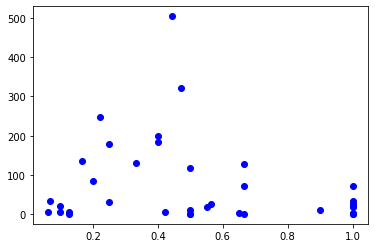

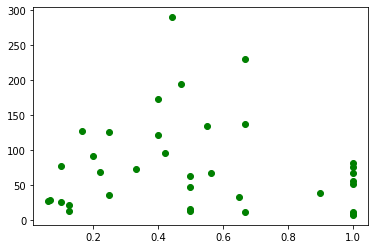

In [15]:
import matplotlib.pyplot as plt
import numpy as np

x1 = []
x2 = []
y1 = []
com = []

for post in posts_reactions_comments:
    doc = nlp(post[0])
    if doc._.subjectivity != 0:
        x1.append(doc._.subjectivity)
        y1.append(int(post[1]))

for post in posts_reactions_comments:
    doc = nlp(post[0])
    if doc._.subjectivity != 0:
        x2.append(doc._.subjectivity)
        com.append(int(post[2]))

x_array = np.array(x1)
y_array = np.array(y1)
com_array = np.array(com)

plt.plot(x_array, y_array, 'bo')
plt.show()
plt.plot(x_array, com_array, 'go')
plt.show()